In [1]:
import importlib
import pandas as pd

import zc_combine.utils.tables_utils as tu
_ = importlib.reload(tu)

In [2]:
all_data = tu.load_data('results/nb101_fixdeg.csv')
stat_df = tu.create_stat_table(all_data, paired=True)
all_tasks = list(all_data.columns.get_level_values(0).unique())
print(all_tasks)
caption = '%s. Average and standard deviation of Kendall tau over 50 independent runs. Bold values indicate the best results and those that are not statistically different from them.'
c_sets = [('Results for predicting validation accuracy on cifar10 on the NB101 benchmark', all_tasks, [0,6,10,16])]

with open('nb101_tables.tex', 'w') as f:
    for c, cols, hlines in c_sets:
        latex_str = tu.latex_table(all_data, stat_df, columns=cols, caption=caption%c, hlines=hlines)
        f.write(latex_str)

['cifar10']


In [3]:
all_data = tu.load_data('results/nb201_all.csv')
stat_df = tu.create_stat_table(all_data, paired=True)
all_tasks = list(all_data.columns.get_level_values(0).unique())
print(all_tasks)
caption = '%s. Average and standard deviation of Kendall tau over 50 independent runs. Bold values indicate the best results and those that are not statistically different from them.'
c_sets = [('Results for predicting validation accuracy on different datasets on the NB201 benchmark', ['cifar10', 'cifar100', 'ImageNet16-120'], [0,6,10,16])]

with open('nb201_tables.tex', 'w') as f:
    for c, cols, hlines in c_sets:
        latex_str = tu.latex_table(all_data, stat_df, columns=cols, caption=caption%c, hlines=hlines)
        f.write(latex_str)

['ImageNet16-120', 'cifar10', 'cifar100']


In [4]:
all_data = tu.load_data('results/nb301_all.csv')
stat_df = tu.create_stat_table(all_data, paired=True)
all_tasks = list(all_data.columns.get_level_values(0).unique())
print(all_tasks)
caption = '%s. Average and standard deviation of Kendall tau over 50 independent runs. Bold values indicate the best results and those that are not statistically different from them.'
c_sets = [('Results for predicting validation accuracy on cifar10 on the NB301 benchmark', all_tasks, [0,6,10,16])]

with open('nb301_tables.tex', 'w') as f:
    for c, cols, hlines in c_sets:
        latex_str = tu.latex_table(all_data, stat_df, columns=cols, caption=caption%c, hlines=hlines)
        f.write(latex_str)

['cifar10']


In [5]:
all_data = tu.load_data('results/tnb101_macro.csv')
stat_df = tu.create_stat_table(all_data, paired=True)
all_tasks = list(all_data.columns.get_level_values(0).unique())
print(all_tasks)
caption = '%s. Average and standard deviation of Kendall tau over 50 independent runs. Bold values indicate the best results and those that are not statistically different from them.'
c_sets = [('Results for various tasks of the TNB101-macro benchmark', all_tasks[:3], [0,6]),
          ('Results for various tasks of the TNB101-macro benchmark', all_tasks[3:6], [0,6]),
          ('Results for various tasks of the TNB101-macro benchmark', all_tasks[6:], [0,6])]

with open('tnb101_macro_tables.tex', 'w') as f:
    for c, cols, hlines in c_sets:
        latex_str = tu.latex_table(all_data, stat_df, columns=cols, caption=caption%c, hlines=hlines)
        f.write(latex_str)

['autoencoder', 'class_object', 'class_scene', 'jigsaw', 'normal', 'room_layout', 'segmentsemantic']


In [6]:
all_data = tu.load_data('results/tnb101_micro.csv')
stat_df = tu.create_stat_table(all_data, paired=True)
all_tasks = list(all_data.columns.get_level_values(0).unique())
print(all_tasks)
caption = '%s. Average and standard deviation of Kendall tau over 50 independent runs. Bold values indicate the best results and those that are not statistically different from them.'
c_sets = [('Results for various tasks of the TNB101-micro benchmark', all_tasks[:3], [0,6,10,16]),
          ('Results for various tasks of the TNB101-micro benchmark', all_tasks[3:6], [0,6,10,16]),
          ('Results for various tasks of the TNB101-micro benchmark', all_tasks[6:], [0,6,10,16])]

with open('tnb101_micro_tables.tex', 'w') as f:
    for c, cols, hlines in c_sets:
        latex_str = tu.latex_table(all_data, stat_df, columns=cols, caption=caption%c, hlines=hlines)
        f.write(latex_str)

C:\Users\marti\anaconda3\envs\results_proc\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\marti\anaconda3\envs\results_proc\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


['autoencoder', 'class_object', 'class_scene', 'jigsaw', 'normal', 'room_layout', 'segmentsemantic']


In [7]:
data = pd.read_csv('results/paper_hw_results.csv')
if 'use_path_encoding' not in data.columns:
    data['use_path_encoding']=False
data['use_path_encoding'].fillna(False, inplace=True)
data['features'] = data.apply(tu.feat_string, axis=1)

targets = list(data['target_key'].unique())

print(targets)

tl = {'fpga_energy': 'ap:tab:fpgaen', 'fpga_latency': 'ap:tab:fpgalat', 'eyeriss_arithmetic_intensity': 'ap:tab:eyerissar', 
      'eyeriss_energy': 'ap:tab:eyerissen', 'eyeriss_latency': 'ap:tab:eyerisslat', 'pixel3_latency': 'ap:tab:pixlat', 
      'edgetpu_latency': 'ap:tab:tpulat', 'raspi4_latency': 'ap:tab:raspilat', 'edgegpu_latency': 'ap:tab:gpulat', 
      'edgegpu_energy': 'ap:tab:edgegpuen'}

with open('hw_tables.tex', 'w') as f:
    for t in targets:
        all_data = data[data['target_key']==t]
        all_data = all_data[['dataset', 'train_size', 'features', 'data_seed', 'tau']]
        all_data = all_data.set_index(['dataset', 'train_size', 'features', 'data_seed'])
        
        all_data = all_data.unstack(3).T
        all_data.index = all_data.index.get_level_values(1)
        
        stat_df = tu.create_stat_table(all_data, paired=True)
        all_tasks = list(all_data.columns.get_level_values(0).unique())
        print(all_tasks)
        caption = '%s. Average and standard deviation of Kendall tau over 50 independent runs. Bold values indicate the best results and those that are not statistically different from them. \\label{%s}'
        c_sets = [('Results on the {\\tt %s} task for various datasets' % t.replace('_', '\_'), ['cifar10', 'cifar100', 'ImageNet16-120'], [0,6])]
    
        for c, cols, hlines in c_sets:
            latex_str = tu.latex_table(all_data, stat_df, columns=cols, caption=caption % (c, tl[t]), hlines=hlines)
            f.write(latex_str)

['fpga_energy', 'fpga_latency', 'eyeriss_arithmetic_intensity', 'eyeriss_energy', 'eyeriss_latency', 'pixel3_latency', 'edgetpu_latency', 'raspi4_latency', 'edgegpu_latency', 'edgegpu_energy']
['ImageNet16-120', 'cifar10', 'cifar100']
['ImageNet16-120', 'cifar10', 'cifar100']
['ImageNet16-120', 'cifar10', 'cifar100']
['ImageNet16-120', 'cifar10', 'cifar100']
['ImageNet16-120', 'cifar10', 'cifar100']
['ImageNet16-120', 'cifar10', 'cifar100']
['ImageNet16-120', 'cifar10', 'cifar100']
['ImageNet16-120', 'cifar10', 'cifar100']
['ImageNet16-120', 'cifar10', 'cifar100']
['ImageNet16-120', 'cifar10', 'cifar100']


In [18]:
all_data = tu.load_wandbd_dump('results/brpnas_results_df.pkl')
stat_df = tu.create_stat_table(all_data, paired=False)
all_tasks = list(all_data.columns.get_level_values(0).unique())
print(all_tasks)

['edgegpu_latency', 'eyeriss_energy', 'edgegpu_energy', 'eyeriss_arithmetic_intensity', 'val_accs', 'fgsm@Linf_eps-2.0', 'imagenet_val_accs', 'fgsm@Linf_eps-1.0', 'aa_apgd-ce@Linf_eps-0.1', 'aa_apgd-ce@Linf_eps-0.5', 'aa_square@Linf_eps-0.1', 'aa_square@Linf_eps-0.5', 'fpga_energy', 'pixel3_latency', 'pgd@Linf_eps-1.0', 'pgd@Linf_eps-2.0', 'eyeriss_latency', 'fpga_latency', 'aa_apgd-ce@Linf_eps-2.0', 'fgsm@Linf_eps-0.1', 'aa_apgd-ce@Linf_eps-1.0', 'edgetpu_latency', 'aa_square@Linf_eps-1.0', 'raspi4_latency', 'pgd@Linf_eps-0.5', 'pgd@Linf_eps-0.1', 'fgsm@Linf_eps-0.5']


In [19]:
adv_tasks = sorted(x for x in all_tasks if 'eps-0.' in x or 'eps-1.' in x)
print(adv_tasks)

caption = '%s. Average and standard deviation of Kendall tau over 50 independent runs. Bold values indicate the best results and those that are not statistically different from them.'
c_sets = [('BRP-NAS model results on the {\\tt aa\\_apgd-ce} adversarial accuracy on cifar10 for various values of $\\epsilon$ on the NB201 benchmark', adv_tasks[:3], [0,6]),
          ('BRP-NAS model results on the {\\tt aa\\_square} adversarial accuracy on cifar10 for various values of $\\epsilon$ on the NB201 benchmark', adv_tasks[3:6], [0,6]),
          ('BRP-NAS model results on the {\\tt fgsm} adversarial accuracy on cifar10 for various values of $\\epsilon$ on the NB201 benchmark', adv_tasks[6:9], [0,6]),
          ('BRP-NAS model results on the {\\tt pgd} adversarial accuracy on cifar10 for various values of $\\epsilon$ on the NB201 benchmark', adv_tasks[9:], [0,6])]

with open('brpnas_tables_adv.tex', 'w') as f:
    for c, cols, hlines in c_sets:
        latex_str = tu.latex_table(all_data, stat_df, columns=cols, caption=caption%c, hlines=hlines)
        f.write(latex_str)

['aa_apgd-ce@Linf_eps-0.1', 'aa_apgd-ce@Linf_eps-0.5', 'aa_apgd-ce@Linf_eps-1.0', 'aa_square@Linf_eps-0.1', 'aa_square@Linf_eps-0.5', 'aa_square@Linf_eps-1.0', 'fgsm@Linf_eps-0.1', 'fgsm@Linf_eps-0.5', 'fgsm@Linf_eps-1.0', 'pgd@Linf_eps-0.1', 'pgd@Linf_eps-0.5', 'pgd@Linf_eps-1.0']


In [20]:
hw_tasks = sorted(x for x in all_tasks if 'energy' in x or 'latency' in x or 'intensity' in x)
print(hw_tasks)

caption = '%s. Average and standard deviation of Kendall tau over 50 independent runs. Bold values indicate the best results and those that are not statistically different from them.'
c_sets = [('BRP-NAS model results for various hardware tasks on cifar10 and NB201', hw_tasks[:3], [0,6]),
          ('BRP-NAS model results for various hardware tasks on cifar10 and NB201', hw_tasks[3:6], [0,6]),
          ('BRP-NAS model results for various hardware tasks on cifar10 and NB201', hw_tasks[6:9], [0,6]),
          ('BRP-NAS model results for various hardware tasks on cifar10 and NB201', hw_tasks[9:], [0,6])]

with open('brpnas_tables_hw.tex', 'w') as f:
    for c, cols, hlines in c_sets:
        latex_str = tu.latex_table(all_data, stat_df, columns=cols, caption=caption%c, hlines=hlines)
        f.write(latex_str)

['edgegpu_energy', 'edgegpu_latency', 'edgetpu_latency', 'eyeriss_arithmetic_intensity', 'eyeriss_energy', 'eyeriss_latency', 'fpga_energy', 'fpga_latency', 'pixel3_latency', 'raspi4_latency']


In [21]:
caption = '%s. Average and standard deviation of Kendall tau over 50 independent runs. Bold values indicate the best results and those that are not statistically different from them.'
c_sets = [('BRP-NAS model results for validation accuracy prediction on cifar10 and ImageNet16-120 on NB201', ['val_accs', 'imagenet_val_accs'], [0,6])]

with open('brpnas_tables_acc.tex', 'w') as f:
    for c, cols, hlines in c_sets:
        latex_str = tu.latex_table(all_data, stat_df, columns=cols, caption=caption%c, hlines=hlines)
        f.write(latex_str.replace('imagenet\\_val\\_accs', 'ImageNet16-120').replace('val\\_accs', 'cifar10'))

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rcParams.update({'text.usetex': True, 'font.family': 'serif', 'text.latex.preamble': '\\usepackage{times} ', 'figure.figsize': (3.25, 2.0086104634371584), 'figure.constrained_layout.use': True, 'figure.autolayout': False, 'savefig.bbox': 'tight', 'savefig.pad_inches': 0.015, 'font.size': 10, 'axes.labelsize': 10, 'legend.fontsize': 6, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'axes.titlesize': 8})

#O = Onehot, S = GRAF, F = flops+params, P = ZCP, E = path encoding
def_labels = ['X', 'O', 'S', 'OF', 'SO', 'SF', 'SOF', 'PF', 'POF', 'PSF', 'PSOF']
sel_labels = ['X', 'O', 'S', 'SO', 'PF', 'POF', 'PSF', 'PSOF']

rn = {'val_accs': 'cifar10', 'imagenet_val_accs': 'ImageNet16-120'}

def select_color(column):
    if 'GRAF' in column or 'Everything' == column:
        return sns.color_palette()[0]
    else:
        return sns.color_palette()[1]

def plot_experiments(all_data, targets, train_sizes, stat_df=None, file_name=None, labels=def_labels):
    fig_width = 487.8225/72.27 # \the\textsize / points per inch
    n_ts = len(train_sizes)
    n_tg = len(targets)
    
    plt.subplots(n_ts, n_tg, sharey=True, figsize=(fig_width, n_ts*2))

    for (si,ts) in enumerate(train_sizes):
        for (ti,target) in enumerate(targets):

            plt_data = all_data[target][ts]
            r_cols = [c for c in labels if c in plt_data.columns]
            plt_data = plt_data[r_cols]
            cols = [tu.FEAT_STRINGS[f].replace('&', '\&') for f in r_cols]
            plt_data.columns=cols
           
            colors = [select_color(c) for c in cols]
            
            plt.subplot(n_ts, n_tg, n_tg*si+ti+1)
            ax = sns.boxplot(plt_data, orient='h', palette=colors, linewidth=1)

            if stat_df is not None:
                s = stat_df[target][ts]
                lpp = len(ax.lines)//len(r_cols)
                ax.lines[:lpp]
                
                import numpy as np
                wh = np.where(s[r_cols] > 0.05)
                
                for l in range(len(r_cols)):
                    if l in np.nditer(wh):
                        for i in range(lpp):
                            ax.lines[l*lpp+i].set_lw(2)
                    else:
                        for i in range(lpp):
                            ax.lines[l*lpp+i].set_lw(0.5)
                            
            if si == 0:
                plt.title(f'{rn[target] if target in rn else target}')
            if ti == 0:
                plt.ylabel(f'Training size: {ts}')
    
    if file_name:
        plt.savefig(f'{file_name}.pdf')
    plt.show()


In [23]:
print("All targets:", list(all_data.columns.get_level_values(0).unique()))
print("All train_sizes:", list(all_data.columns.get_level_values(1).unique()))

def plot_all(all_data, stat_df=None, file_name=None, split_targets=None, labels=def_labels):
    ts = list(all_data.columns.get_level_values(0).unique())
    targets = []
    if not split_targets:
        targets = [ts]
    else:
        st = 0
        for s in split_targets:
            targets.append(ts[st:st+s])
            st += s
    
    train_sizes = [32, 128, 1024]
    
    for i,t in enumerate(targets):
        if file_name:
            fn = f'{file_name}-{i+1}'
        else:
            fn = None
        plot_experiments(all_data,t, train_sizes, stat_df=stat_df, file_name=fn, labels=labels)

All targets: ['edgegpu_latency', 'eyeriss_energy', 'edgegpu_energy', 'eyeriss_arithmetic_intensity', 'val_accs', 'fgsm@Linf_eps-2.0', 'imagenet_val_accs', 'fgsm@Linf_eps-1.0', 'aa_apgd-ce@Linf_eps-0.1', 'aa_apgd-ce@Linf_eps-0.5', 'aa_square@Linf_eps-0.1', 'aa_square@Linf_eps-0.5', 'fpga_energy', 'pixel3_latency', 'pgd@Linf_eps-1.0', 'pgd@Linf_eps-2.0', 'eyeriss_latency', 'fpga_latency', 'aa_apgd-ce@Linf_eps-2.0', 'fgsm@Linf_eps-0.1', 'aa_apgd-ce@Linf_eps-1.0', 'edgetpu_latency', 'aa_square@Linf_eps-1.0', 'raspi4_latency', 'pgd@Linf_eps-0.5', 'pgd@Linf_eps-0.1', 'fgsm@Linf_eps-0.5']
All train_sizes: [1024, 32, 128]


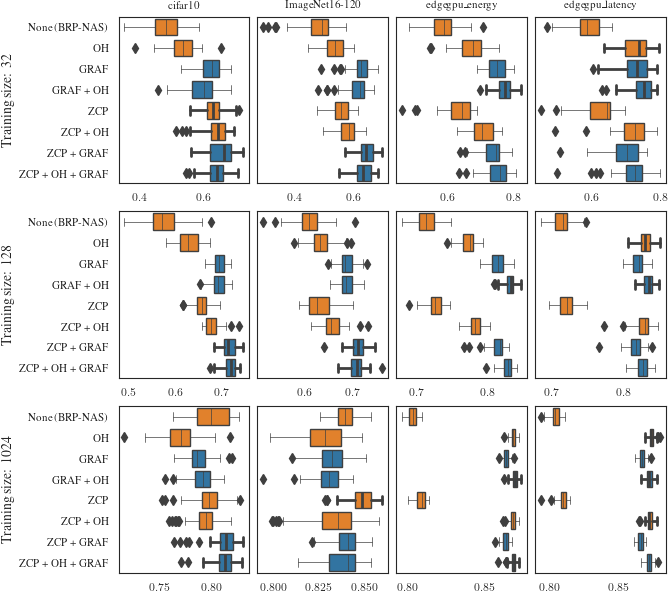

In [24]:
targets=['val_accs', 'imagenet_val_accs', 'edgegpu_energy', 'edgegpu_latency']

plot_all(all_data[targets], stat_df=stat_df, file_name='brpnas-acc-short', labels=sel_labels)